In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

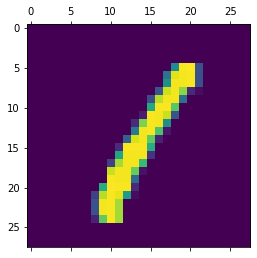

In [7]:
plt.matshow(x_train[3])

In [8]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)
print(x_train_flatten.shape,x_test_flatten.shape)

(60000, 784) (10000, 784)


In [12]:
x_train_flatten[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation ='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4683 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9254


In [14]:
# Testing/Evaluating the accuracy of the model
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9246


[0.26669007539749146, 0.9246000051498413]

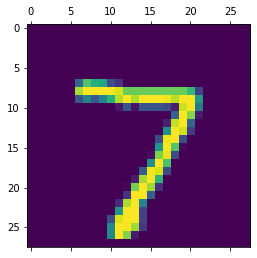

In [15]:
plt.matshow(x_test[0])

In [16]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.3318011e-02, 2.9053203e-07, 4.0361021e-02, 9.6129382e-01,
       3.2794522e-03, 1.3575234e-01, 1.2270867e-06, 9.9986857e-01,
       1.4174096e-01, 6.3656408e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0]) # It will find the largest value in array and it will print that index

7

In [18]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    7,  924,   16,   10,    6,   12,   11,   37,    4],
       [   3,    0,   20,  918,    0,   25,    2,   12,   24,    6],
       [   1,    1,    5,    1,  923,    0,    9,    4,   10,   28],
       [   8,    1,    4,   36,   10,  778,    9,    8,   32,    6],
       [  10,    3,    8,    1,    7,   22,  901,    2,    4,    0],
       [   1,    5,   22,    7,    8,    1,    0,  955,    3,   26],
       [   6,    7,    7,   20,    9,   25,    8,   12,  875,    5],
       [  11,    7,    1,    8,   34,    7,    0,   32,    9,  900]])>

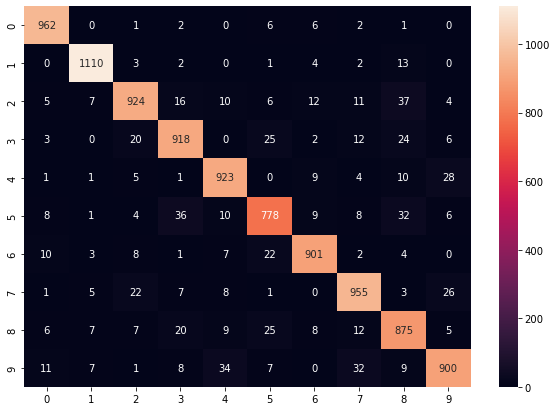

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel='Predicted'
plt.ylabel='Actual'

In [23]:
# Adding hidden layers to the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2755 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1257 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0676 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9835


In [24]:
# Testing/Evaluating the accuracy of the model
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9749


[0.08077312260866165, 0.9749000072479248]

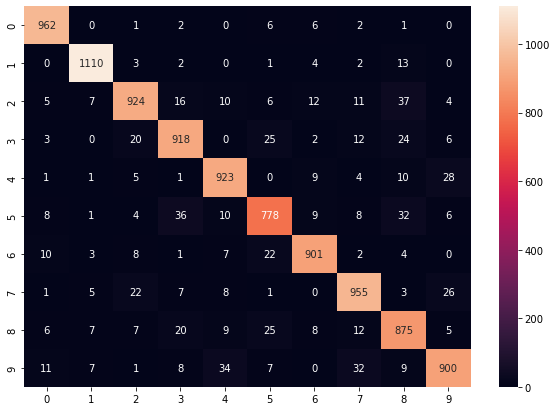

In [25]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel='Predicted'
plt.ylabel='Actual'

In [26]:
# Adding hidden layers to the model and making change to x_train_flatten
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1223 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0531 - accuracy: 0.9835
